In [28]:
import numpy as np
import pandas as pd


DATA_PATH = 'wine.data'


def generate_dataset(file_path: str):
  """
  Reads the data from the file and creates a pd.DataFrame object with the data

  :param file_path: absolute path to the file
  :type file_path: str
  :return dataframe: the data in a pd.DataFrame format
  :rtype: pd.DataFrame
  """
  column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                  'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                  'Hue', 'OD280/OD315 of diluted wines', 'Proline']

  # Making the first column last, since the first value in each row is the class and converting the classes to int
  dataframe = pd.read_csv(file_path, names=column_names, dtype='float32')
  columns = list(dataframe.columns)
  columns = columns[1:] + [columns[0]]
  dataframe = dataframe[columns]
  dataframe['Class'] = dataframe['Class'].astype('int32')

  return dataframe


if __name__ == '__main__':
  df = generate_dataset(DATA_PATH)
  print(df.head())
  print('')
  # Now that we have the data, we are going to do some exploratory data analysis (EDA) on it

  # Getting DataFrame data types (already set when reading the data from the file)
  ## After checking each column, a column is integers only, so we convert it from float to int ('Classes' were previously converted)
  ## This is the 'Magnesium' column
  ## Although 'Proline' column looks as if it only contains integers, there are some float values
  ## Then again, data is converted back to float during normalization
  print(df.dtypes)
  df['Magnesium'] = df['Magnesium'].astype('int32')
  print('')

  # Getting DataFrame descriptive statistics (without classes)
  df_2 = pd.DataFrame(df.drop(labels='Class', axis=1, inplace=False))
  print(df_2.describe())
  print('')

  # Checking if null values are present
  print(f'Are null values present: {df.isnull().values.any()}')
  print('')

  # Checking if duplicated entries (rows) are present
  print(f'Are duplicate entries (rows) present: {df.duplicated().values.any()}')
  print('')

  # Extracting some useful data from the dataset
  data = df.groupby('Class')['Alcohol'].mean()
  print(f'Average alcohol percentage of wine derived from cultivar 1 (class 1): {round(float(data.iloc[0]), 3)}%')
  print(f'Average alcohol percentage of wine derived from cultivar 2 (class 2): {round(float(data.iloc[1]), 3)}%')
  print(f'Average alcohol percentage of wine derived from cultivar 3 (class 3): {round(float(data.iloc[2]), 3)}%')
  print('')

  data = df.groupby('Class')['Ash'].max()
  print(f'Largest ash quantity (mg/L) of wine derived from cultivar 1 (class 1): {round(float(data.iloc[0]), 3)} mg/L')
  print(f'Largest ash quantity (mg/L) of wine derived from cultivar 2 (class 2): {round(float(data.iloc[1]), 3)} mg/L')
  print(f'Largest ash quantity (mg/L) of wine derived from cultivar 3 (class 3): {round(float(data.iloc[2]), 3)} mg/L')
  print('')

  ## data.argmin() + 1, because indexes begin at zero
  data = df.groupby('Class')['Color intensity'].min()
  print(f'Wine with lowest color intensity is derived from cultivar {data.argmin() + 1} (class {data.argmin() + 1})')
  data = df.groupby('Class')['Color intensity'].max()
  print(f'Wine with highest color intensity is derived from cultivar {data.argmax() + 1} (class {data.argmax() + 1})')
  print('')

  ## OD280/OD315 of diluted wines is a method for calculating protein concentration in wines
  data = df.groupby('Class')['OD280/OD315 of diluted wines'].max()
  print(f'The wine with the highest concentration of proteins is derived from cultivar {data.argmax() + 1} (class {data.argmax() + 1})')
  data = df.groupby('Class')['OD280/OD315 of diluted wines'].min()
  print(f'The wine with the lowest concentration of proteins is derived from cultivar {data.argmin() + 1} (class {data.argmin() + 1})')

   Alcohol  Malic acid   Ash  ...  OD280/OD315 of diluted wines  Proline  Class
0    14.23        1.71  2.43  ...                          3.92   1065.0      1
1    13.20        1.78  2.14  ...                          3.40   1050.0      1
2    13.16        2.36  2.67  ...                          3.17   1185.0      1
3    14.37        1.95  2.50  ...                          3.45   1480.0      1
4    13.24        2.59  2.87  ...                          2.93    735.0      1

[5 rows x 14 columns]

Alcohol                         float32
Malic acid                      float32
Ash                             float32
Alcalinity of ash               float32
Magnesium                       float32
Total phenols                   float32
Flavanoids                      float32
Nonflavanoid phenols            float32
Proanthocyanins                 float32
Color intensity                 float32
Hue                             float32
OD280/OD315 of diluted wines    float32
Proline         

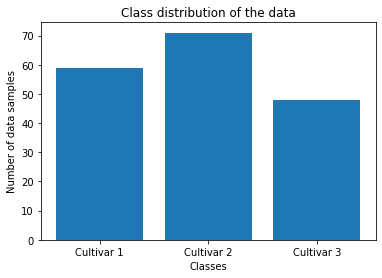

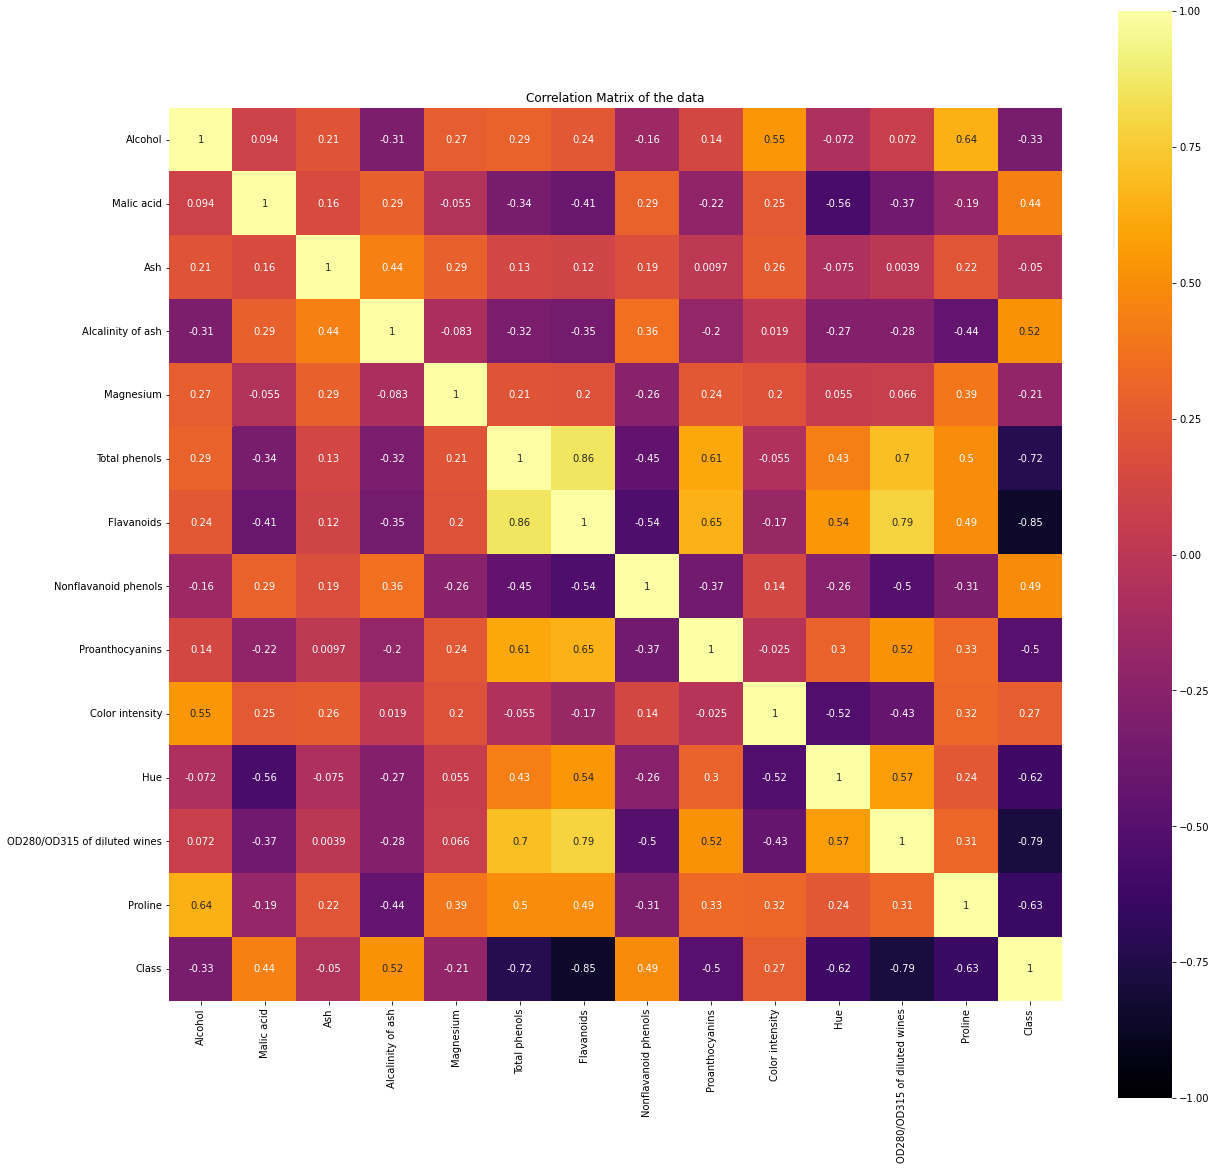

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt


def visualize_class_distributions(dataframe: pd.DataFrame):
  """
  Visualizes the data distribution over the classes

  :param dataframe: the dataset in a pd.DataFrame format
  :type dataframe: pd.DataFrame
  :returns: None
  """
  counter_1 = 0
  counter_2 = 0
  counter_3 = 0

  class_column_list = dataframe['Class'].tolist()

  for el in class_column_list:
    if el == 1:
      counter_1 += 1
    elif el == 2:
      counter_2 += 1
    else:
      counter_3 += 1

  classes = ['Cultivar 1', 'Cultivar 2', 'Cultivar 3']
  values = [counter_1, counter_2, counter_3]

  plt.bar(classes, values)
  plt.title('Class distribution of the data')
  plt.xlabel('Classes')
  plt.ylabel('Number of data samples')
  plt.show()


if __name__ == '__main__':
  # Visualizing data distribution over the classes
  visualize_class_distributions(df)
  print('')
  # We don't have an uniform distribution over the data, so we need to assign class weights during classification

  # Visualizing a correlation matrix of the data
  fig, ax = plt.subplots(figsize=(20, 20))
  ax.set_title('Correlation Matrix of the data')
  sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap='inferno', xticklabels=True, yticklabels=True, annot=True, ax=ax, square=True)
  ## Correlation tells us if there is a linear relationship between the variables
  ## Positive correlation between X and Y tells us that, if X increases (or decreases), Y will increase (or decrease)
  ## Negative correlation between X and Y tells us that, if X increases (or decreases), Y will decrease (or increase)
  ## Correlated variables may or may not be causal
  ## Example from the data, 'Flavanoids' are positively correlated to 'Total phenols' (0.86). This is understandable, since flavanoids are phenolic compounds
  ## As the quantity of flavanoids increases, we can expect the total phenols quantity to increase as well
  ## Correlation between a variable and herself is always 1
  ## Correlation is calculated using Pearson's correlation coefficient

In [30]:
# Classifying using k-Nearest Neighbors and Decision Tree
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def prepare_data_for_classification(dataframe: pd.DataFrame):
  """
  Prepares the data for classification, by normalizing and splitting the classes from the data

  :param dataframe: the pd.DataFrame with the data and classes
  :type dataframe: pd.DataFrame
  :returns:
    - dataset: the data normalized with MinMaxScaler, type: list
    - classes: the labels for the data, type: list
  """
  scaler = MinMaxScaler()

  dataset = scaler.fit_transform(dataframe[list(dataframe.columns)[:-1]])
  classes = dataframe['Class'].tolist()

  return dataset, classes


if __name__ == '__main__':
  data, classes = prepare_data_for_classification(df)

  # Getting weights for the classes
  class_weights = compute_class_weight('balanced', np.unique(classes), classes)
  class_weights = {1: class_weights[0], 2: class_weights[1], 3: class_weights[2]}

  # Splitting data on train and test sets
  train_X, test_X, train_Y, test_Y = train_test_split(data, classes, test_size=0.30, random_state=0)

  # Finding optimal parameter values for k-Nearest Neighbors using GridSearchCV
  ## parameters = {'n_neighbors': [5, 10, 15, 20], 'weights': ('uniform', 'distance'), 
  ##               'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 
  ##               'metric': ('euclidean', 'minkowski', 'manhattan', 'chebyshev')}
  ## k_nearest = KNeighborsClassifier()
  ## best_classifier = GridSearchCV(estimator=k_nearest, param_grid=parameters)
  ## best_classifier.fit(train_X, train_Y)
  ## print(best_classifier.best_params_)
  ## Optimal parameter values for k-Nearest Neighbor: 'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'
  k_nearest_neighbors = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=10, weights='uniform')
  k_nearest_neighbors.fit(train_X, train_Y)

  predictions = k_nearest_neighbors.predict(test_X)
  print(f'Accuracy with test data - k-Nearest Neighbors: {round(accuracy_score(y_pred=predictions, y_true=test_Y), 3)}')
  print(f'Precision score (weighted) - k-Nearest Neighbors: {round(precision_score(y_pred=predictions, y_true=test_Y, average="weighted"), 3)}')
  print(f'Recall score (weighted) - k-Nearest Neighbors: {round(recall_score(y_pred=predictions, y_true=test_Y, average="weighted"), 3)}')
  print(f'F1 score (weighted) - k-Nearest Neighbors: {round(f1_score(y_pred=predictions, y_true=test_Y, average="weighted"), 3)}')
  print('')

  # Finding optimal parameter values for DecisionTreeClassifier
  ## parameters = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_features': ('auto', 'sqrt', 'log2')}
  ## decision_tree = DecisionTreeClassifier(random_state=0)
  ## best_tree = GridSearchCV(estimator=decision_tree, param_grid=parameters)
  ## best_tree.fit(train_X, train_Y)
  ## print(best_tree.best_params_)
  ## Optimal parameter values for DecisionTreeClassifier: 'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'
  decision_tree = DecisionTreeClassifier(criterion='entropy', max_features='auto', splitter='best', random_state=0, class_weight=class_weights)
  decision_tree.fit(train_X, train_Y)

  predictions = decision_tree.predict(test_X)
  print(f'Accuracy with test data - Decision Tree: {round(accuracy_score(y_pred=predictions, y_true=test_Y), 3)}')
  print(f'Precision score (weighted) - Decision Tree: {round(precision_score(y_pred=predictions, y_true=test_Y, average="weighted"), 3)}')
  print(f'Recall score (weighted) - Decision Tree: {round(recall_score(y_pred=predictions, y_true=test_Y, average="weighted"), 3)}')
  print(f'F1 score (weighted) - Decision Tree: {round(f1_score(y_pred=predictions, y_true=test_Y, average="weighted"), 3)}')

Accuracy with test data - k-Nearest Neighbors: 0.981
Precision score (weighted) - k-Nearest Neighbors: 0.982
Recall score (weighted) - k-Nearest Neighbors: 0.981
F1 score (weighted) - k-Nearest Neighbors: 0.982

Accuracy with test data - Decision Tree: 0.889
Precision score (weighted) - Decision Tree: 0.895
Recall score (weighted) - Decision Tree: 0.889
F1 score (weighted) - Decision Tree: 0.89
